In [4]:
pip install ortools


     |████████████████████████████████| 27.1MB 1.3MB/s 


#Projet Data
## Description de  l'algorithme
### Modelisation

1.   Le Problème

Le but de notre étude est de générer une tournée de livraison (problème du VRP). Le problème algorithmique consiste donc à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la distance totale parcourue.
Vous devrez proposer une méthode issue de la Recherche Opérationnelle pour générer une tournée de livraison correspondant à ce problème. L’implémentation se fera sur une version de base du problème, à laquelle vous pourrez ajouter des contraintes supplémentaires, rendant le problème plus réaliste, mais aussi plus dur à traiter.
Par ailleurs, vous devrez effectuer une étude statistique du comportement de votre méthode de résolution, faisant apparaitre ses performances (qualité de solution, temps de convergence). Idéalement, des statistiques prédictives permettent d’extrapoler ce comportement sur des cas d’usages que vos ordinateurs seuls ne pourraient traiter.



2.   Etude de Complexité

La complexité permet de quantifier (mettre une formule mathématique) la relation entre les conditions de départ et le temps effectué par l'algorithme , ainsi que l'optimisation du stockage de données dans certains cas. 

Mesure asymptotique:

Nous allons effectuer une comparaison entre deux algorithmes résolvant le même problème de Ro mais de par un procédé différant l'algorithme de (      ) et l'algorithme (     ), l'objectif étant de comparé les temps d'exécution de chacun d'eux.

**Faire comparatif temps d'éxécution des deux algorithmes **

*Deux algorithmes résolvent le même problème (donc sont corrects), et que toutes les opérations sont prises en compte pour la mesure de la complexité, le premier algorithme fait N opérations et le deuxième 2N.*

Consomation de mémoire:

La complexité repose aussi sur le nombre de mémoire allouer pour repondre au problème posés. Un algorithme prenant moins de mémoire se plus susceptible d'avoir un temps d'éxécution plus faible que l'autre .

*Il est intéressant en général de mesurer à la fois la complexité en temps (la rapidité d'exécution) et en mémoire (la quantité d'espace occupé pendant l'exécution) de l'algorithme.*

**Faire comparatif d'utilisation de mémoire pour deux algorithme donnée **

La complexité du pire cas :

Dans se cas,  il est question de mettre les données sotcker dans l'ordre avec lequels elle seront appeller, car une donné spécifique situer à la fin d'un tableau et qui doit etre appeller par une fonction au début du programme, va etre plus long a parcourir que si la donnée était situer au début de tableau. 

**Donner exemple optimisation de code pour éxécution rapide **

*Pour notre exemple, supposons que l'élément se trouve effectivement dans la liste, mais qu'il soit placé à une position aléatoire. Elle a autant de chances de se trouver au début de la liste (donc qui s'arrête très vite), qu'au milieu ou carrément à la fin (on doit alors parcourir toute la liste). En moyenne, on fera donc un demi-parcours par essai : entre un parcours complet et un demi-parcours, il y a seulement un facteur multiplicatif constant, donc c'est équivalent du point de vue de la complexité.*

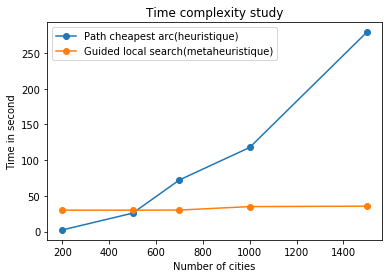

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([200, 500, 700, 1000, 1500])
y = np.array([2.37, 25.82, 72.35, 117.8, 278.98 ])
z= np.array([30.02, 30.01, 30.16, 35, 35.61 ])
plt.plot(x, y, "o-", label="Path cheapest arc(heuristique)")
plt.plot(x, z, "o-", label="Guided local search(metaheuristique)")
plt.ylabel('Time in second')
plt.xlabel('Number of cities')
plt.title('Time complexity study')
plt.legend()

plt.show()

Un graphique réprésentant le nombre villes traiter (en abscisse) par le temps d'exécution des programmes (en ordonné). Le tracé en bleu représente le programme heuristique et le tracé en orange représente le programme metaheuristique, c'est deux programmes sont utilisé et lancer en meme temps pour repondre a un problème similaire donné. Chaque programme a était démarrer avec un nombre de villes a traiter différant a chaque réexécution. L'on peux observer que pour un problème donné ayant moins de 500 villes a traité , la solution heuristique reste la plus rapide alors que pour un programme uilisant plus de 500 villes , la solution metaheuristique devient de plus en plus efficace. Notre solution devant trairer un problème gérant plus de 1000 villes utilisera donc la solution méthaeuristique qui semble etre la solution evidante pour notre projet.

3.   Choix et description de l'algorithme 


L'algorithme choisit est celui de la Recherche Locale Guidée (GLS)

---

**Résumer fonctionnement général :**


La recherche locale guidée (GLS) est un algorithme métaheuristiques dont le but est d'aider la recherche locale pour échapper  à des optimums locaux.

La méthode de recherche locale guidée a été appliquée avec succès à un certain problème d’optimisations difficiles comme le problème du voyageur de commerce (TSP) .

Plus precisement c'est un algorithme d’optimisation  visant à résoudre des problèmes d’optimisation difficile  (souvent issus des domaines de la recherche opérationnel , ou de l’intelligence artificielle. Ils sont généralement des algorithmes stochastique itératifs, qui progressent vers un optimum global.

Cette algorithme vas choisir un optimum local et vas etudier ces caracteristique telles que la distance entre deux ville ou le volumme libre present de le cammions dans notre cas. l'algorithme etudie donc tous les optimun locaux et vas leur associer une penalité qui vas permettre a l'algorithme de trouver la meilleur solution concevable dans un temps donnée. 

---

**Différents paramètres de l'algorithme :**


Les differents paramètre que l'on utilise dans ce programme sont: 


*   Une matrice de distance :  Cette matrice permet de recuperer la distance entre chaque ville et donc de connaitre la distance parcourue d'un vehicule et du trajet totale
*   Une taille d'objet : Cette taille nous est utile pour la gestion des contrainte pour savoir combien d'objet peut prendre un camion.
*   Un volumme de stockage pour les cammion :c'est la taille maximum d'objet qu'un camion peut transporter
*   Un nombre de vehicule utilisable 
*   Une ville de depart et d'arriver 


---
**Spécificités algorithmiques ajoutées à la méthode :**


Pour notre algorithme ont est partie d'un probleme VRP basic ou les seule parametre sont la distance entre deux ville et le but est de trouver la plus petite distance a parcourir en pasant par toutes les villes etde revenir a son point de depart.

Nous avons decidé d'ajouter a cela une contrainte ou les vehicule passe rammaser les objets dans les villes pour les rammener aux points de depart.
Pour cela on due ajouter un parametre qui est la dimmension d'un objet et d'un vehicule. cela nous as ammener a modifier l'algorithme pour qu'il ne recherche plus en premier lieu a faire la plus petite distance, mais qu'il recherche a passer dans toutes les villes avec un objet pour remplir efficacemment le camions et avoir une distance parcourue la plus petite possible.

---
**Modélisation du problème selon le formalisme de l'algorithme :**


L'algorithme va commencer par lancer le programme de creation du dataset.


1.   Dans le Dataset le programme va commencer par demander le nombre de ville que l'on veut generer
2.   Ensuite il vas generer les vehicules
3.   Puis il creer une matrice de localisation 
4.   Ensuite il genere les vehicule et leur dimmension avec la dimmension des objet par ville
5.   Pour finir il ecrie dans un fichier Json les données.

Puis quand cela est fait il demarre l'algorithme qui vas nous generer une solution



1.   Pour cela il va commencer par lire les données du fichier JSON et les parser
2.   puis il mets en places les parametre de l'algorithme choisit aux prealable
3.   pour finir il affiche les solution ou la solution possible






##Etude statistique 


L’analyse descriptive: a pour but de résumer les données en leur assignant une nouvelle représentation, de synthétiser en faisant ressortir ce qui est dissimulé par le volume. On peut classer les individus dans des catégories, trouver les individus les plus proches
ou les plus éloignés entre eux ; mais aussi trouver les exceptions ou les cas atypiques. On peut également voir si des variables sont proches, expliquer une variable en fonction des autres ou encore repérer les variables les plus influentes.

L’analyse prédictive: consiste à analyser les données actuelles afin de faire des hypothèses sur des comportements futurs. On se sert des données que l’on possède déjà pour extrapoler et deviner le comportement de nouveaux individus mais également l’évolution des individus déjà présents

Proposition d'analyse : répartir les villes en fonction de leur distance du point de départ 